# Object Detection - Visualize Results

This example illustrates the usage of [MAX Object Detector](https://developer.ibm.com/exchanges/models/all/max-object-detector) model. This notebook guides you through running the model on a sample image to get the objects, extracting the bounding boxes and then visualizing them over the image.


## Setup

The notebook calls the `MAX Object Detector` microservice, which must be running. You can either use the [hosted demo instance](http://max-object-detector.max.us-south.containers.appdomain.cloud), or follow the instructions for [deploying the microservice locally from the Dockerhub image](https://github.com/IBM/MAX-Object-Detector#deploy-from-docker-hub). See more on [dockerhub](https://hub.docker.com/r/codait/max-object-detector).

In [1]:
# This notebook requires matplotlib, Pillow and requests
# You only need to run the line below to install these if you don't already have them installed

! pip install -q matplotlib Pillow requests

In [2]:
import io
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import requests

In [3]:
# This url must point to a running instance of the model microservice
# By default this assumes you are using the hosted demo instance
# If you want to use the model that is running locally, pass the `local_port` field.
def call_model(input_img, local_port=None, thresh=0.5):
    """
    Takes in input image file path, posts the image to the model and returns face bboxes and emotion predictions
    If local port is not specified, uses the long running instance.
    If local port is specified, uses the local instance.
    """
    if local_port:
        print('calling local port')
        url = 'http://localhost:'+ str(local_port)+'/model/predict?threshold=' + str(thresh)
    else:
        print('calling hosted instance')
        url = 'http://max-object-detector.max.us-south.containers.appdomain.cloud/model/predict'

    files = {'image': ('image.jpg', open(input_img, 'rb'), 'images/jpeg') }
    r = requests.post(url, files=files).json()
    
    return r

## Step 1: Visualizing the test image

First we load the image with Pillow and display the image in our notebook

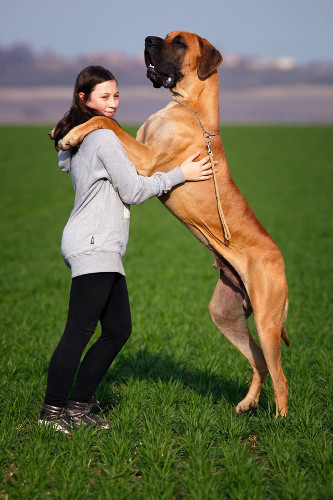

In [4]:
img_path = 'samples/dog-human.jpg'
image = Image.open(img_path)
image

## Step 2: Call model to detect objects in the image

In [5]:
model_response = call_model(img_path)

calling hosted instance


## Step 3: Visualize model response

The model returns JSON containing a `predictions` field which is an array of JSON objects, one for each object detected in the image. For each object, the bounding box coordinates are contained in the `detection_box` field, while the object labels can be found in the `label` and `label_id` fields.

The bounding box coordinates are given in the format `[ymin, xmin, ymax, xmax]`, where each coordinate is _normalized_ by the appropriate image dimension (height for `y` or width for `x`). Each coordinate is therefore in the range `[0, 1]`. In order to use these coordinates to display the bounding boxes, we must first map them back to the same range as the original image, so that they become pixel coordinates.

Additionally there is also a `probability` field which indicates the model's confidence of the particular object's class.

In [6]:
# Explore the model results - there should be 2 entries in the `predictions` array
import json
print(json.dumps(model_response, indent=2))

{
  "status": "ok",
  "predictions": [
    {
      "label_id": "1",
      "label": "person",
      "probability": 0.9398878216743469,
      "detection_box": [
        0.12330064177513123,
        0.12594594061374664,
        0.8510028123855591,
        0.584544837474823
      ]
    },
    {
      "label_id": "18",
      "label": "dog",
      "probability": 0.7850492000579834,
      "detection_box": [
        0.08812257647514343,
        0.21168074011802673,
        0.8599554300308228,
        0.7307435274124146
      ]
    }
  ]
}


In [7]:
def predict(path, thresh=0.5, local=False):
    # We display bounding boxes and the class label with the predicted probability for each object.
    local_port = 5000 if local else None
    model_response = call_model(path, local_port=local_port, thresh=thresh)
    image = Image.open(path)
    # Get the image height and width
    image_width, image_height = image.size
    # Create figure and axes
    fig, ax = plt.subplots()
    # Set larger figure size
    fig.set_dpi(180)
    # Display the image
    plt.imshow(image)

    # Set up the color of the bounding boxes and text
    color = '#00FF00'
    # For each object, draw the bounding box and predicted class together with the probability
    for prediction in model_response['predictions']:
        bbox = prediction['detection_box']
        # Unpack the coordinate values
        y1, x1, y2, x2 = bbox
        # Map the normalized coordinates to pixel values: scale by image height for 'y' and image width for 'x'
        y1 *= image_height
        y2 *= image_height
        x1 *= image_width
        x2 *= image_width
        # Format the class probability for display
        probability = '{0:.3f}'.format(prediction['probability'])
        # Format the class label for display
        label = '{}'.format(prediction['label'])
        label = label.capitalize()
        # Create the bounding box rectangle - we need the base point (x, y) and the width and height of the rectangle
        rectangle = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=0.5, edgecolor=color, facecolor='none')
        ax.add_patch(rectangle)
        # Plot the bounding boxes and class labels with confidence scores
        plt.text(x1, y1-3, label, fontsize=3, color=color, fontweight='bold',horizontalalignment='left')
        plt.text(x2, y1-3, probability, fontsize=3, color=color, fontweight='bold',horizontalalignment='right')
    plt.axis('off')
    plt.show()

calling hosted instance


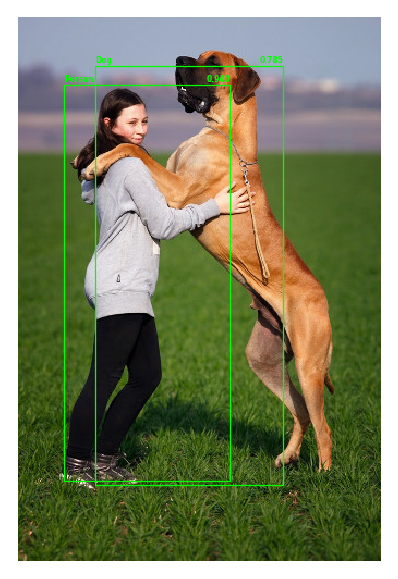

In [8]:
predict('./samples/dog-human.jpg', local=False)

calling hosted instance


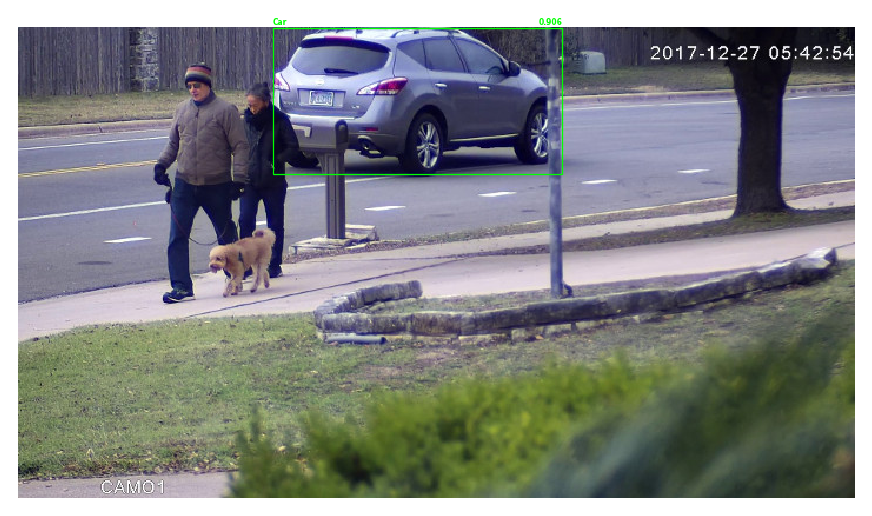

In [9]:
predict('./samples/cam1.jpg', local=False)

calling hosted instance


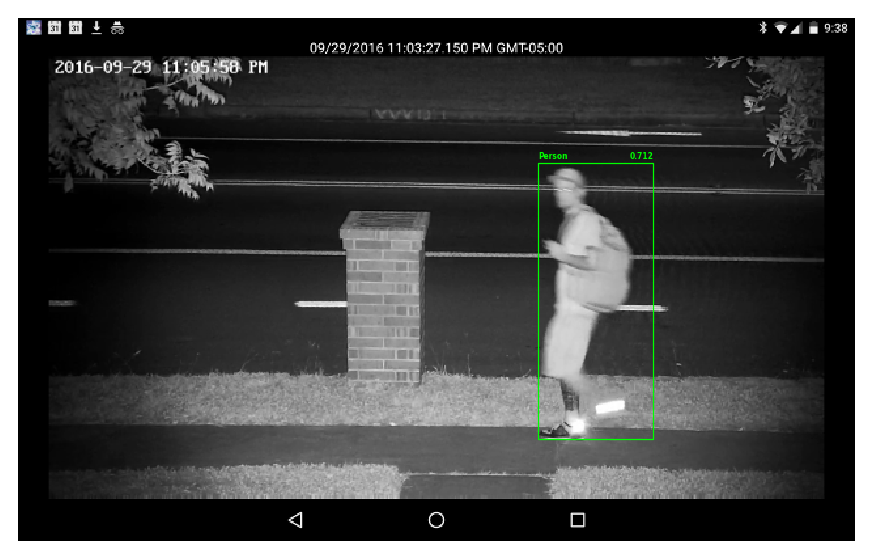

In [10]:
predict('./samples/cam2.png', local=False)

calling hosted instance


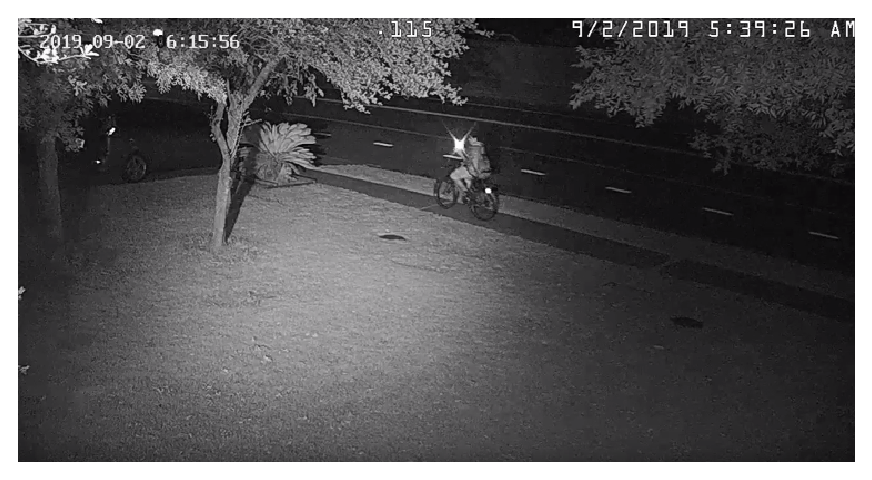

In [11]:
predict('./samples/cam3.png', thresh=0.17, local=False)

calling hosted instance


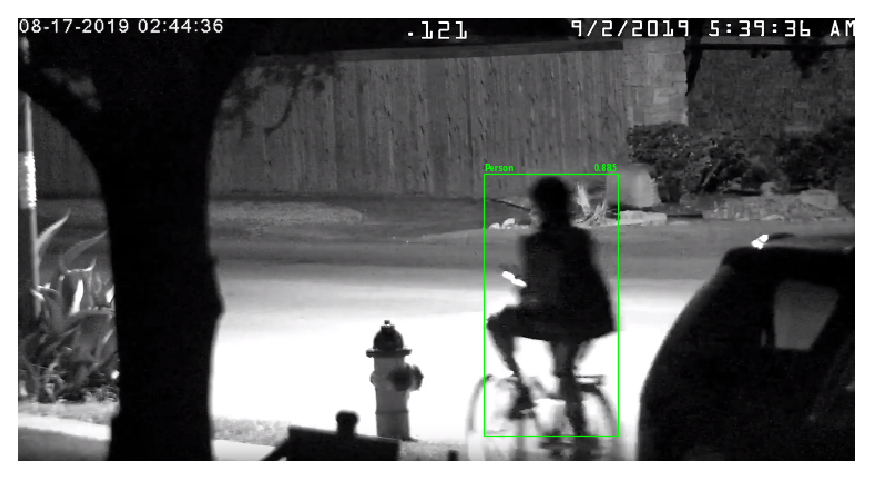

In [12]:
predict('./samples/cam4.png', local=False)

calling hosted instance


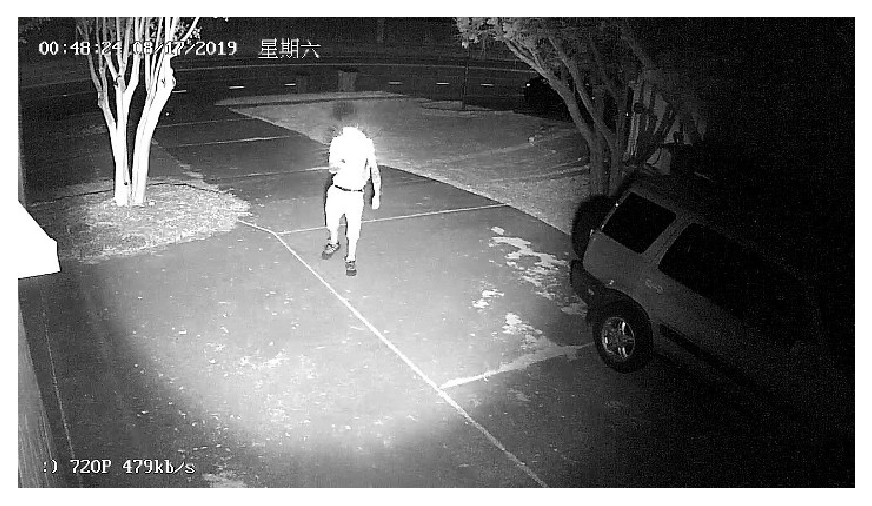

In [13]:
predict('./samples/cam2.jpg', local=False)

calling hosted instance


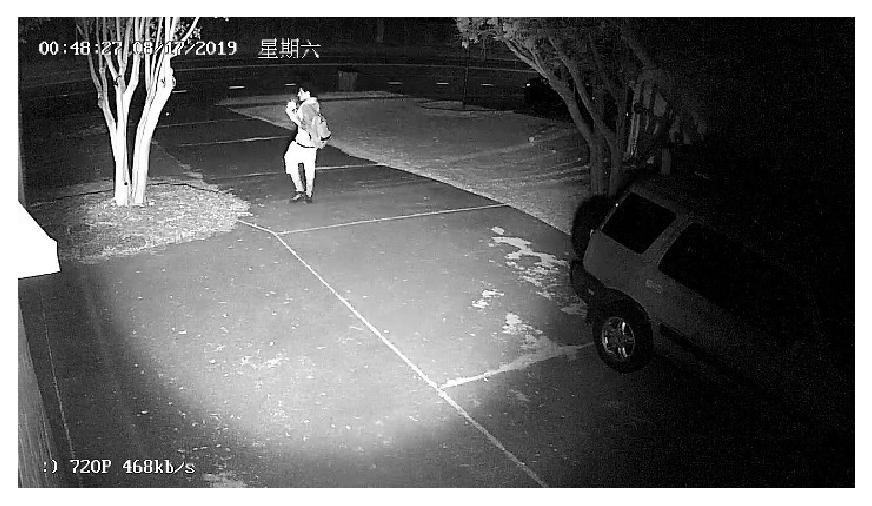

In [14]:
predict('./samples/cam3.jpg', local=False)

calling hosted instance


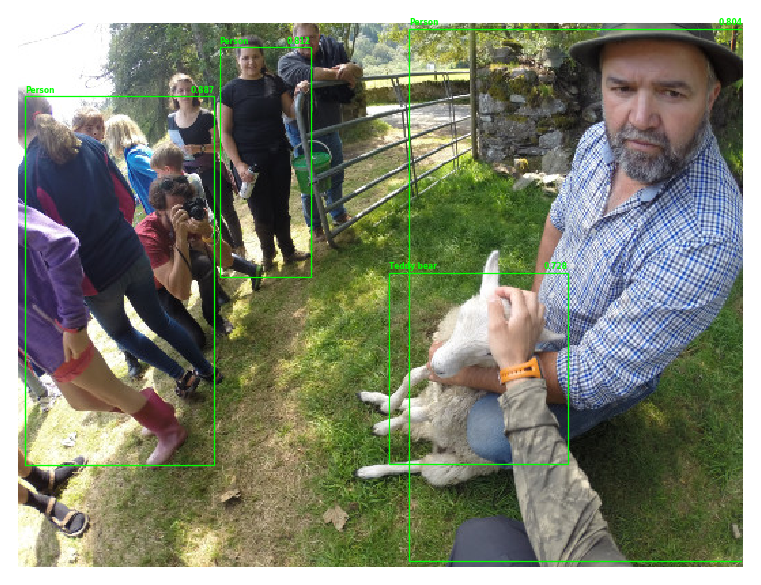

In [15]:
predict('./samples/sheep.jpg', local=False)

calling hosted instance


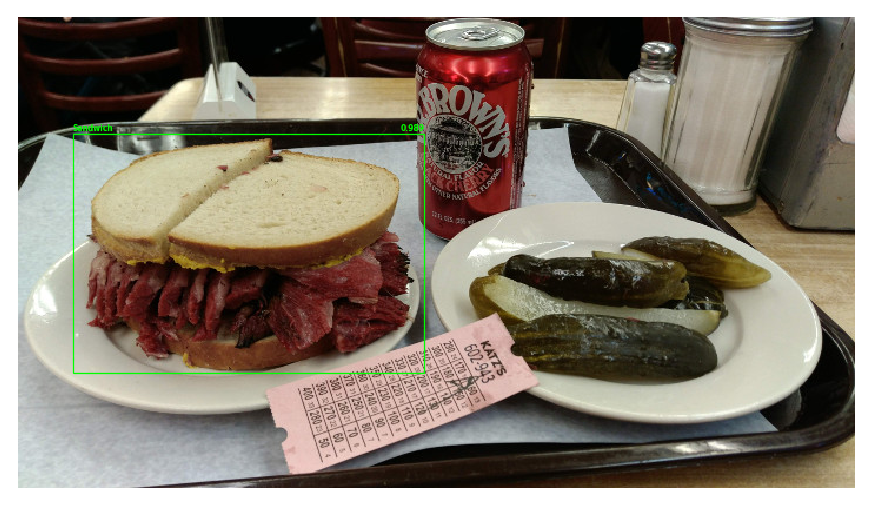

In [16]:
predict('./samples/sandwich.jpg', local=False)